# Calibration Likelihood Ratio with pT and background

**Goal:** Increase the complexity of the simulator, to have a discriminant that depends on the pT.

In [1113]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn

## Step 0: Data generation

- Suppose that the QCD background has a softer spectrum (super reasonable)
- And then suppose we get better Xbb discrimination as pT increases

In [1114]:
N = int(1e6)

s_z = np.random.normal(size=(N,))
b_z = np.random.normal(size=(N,))

s_pt = 200+200*np.exp(s_z)
b_pt = 200+100*np.exp(b_z)

s = (2*s_z+3) + 3* np.random.normal(size=(N,))
b = (-2*b_z-3) + 3* np.random.normal(size=(N,))

s_data = s -.5

In [1115]:
nb = 50
r_pt = (200,1000)
r = (-10,10)
lw = 2.5

c_mc = 'C0'
c_dat = 'lightskyblue'
c_qcd = 'gold'

(-10.0, 10.0)

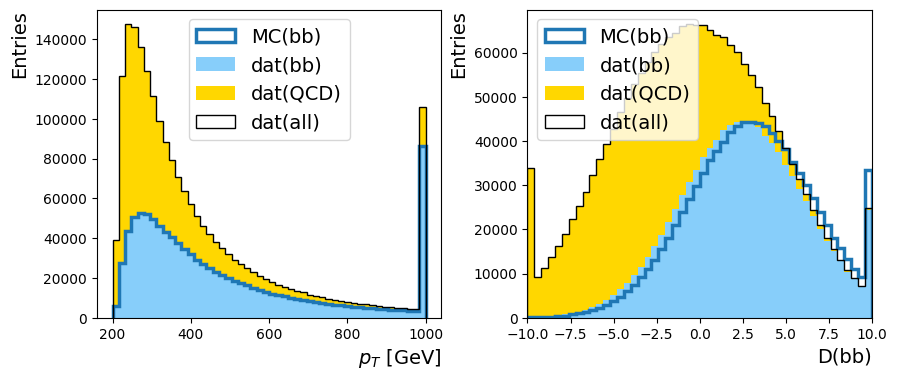

In [1116]:
fig, ax =  plt.subplots(1,2,figsize=(10,4),gridspec_kw={'wspace':.25})

# pt
h_mc,e,_ = ax[0].hist(np.clip(s_pt,*r_pt),nb,r_pt,histtype='step',color=c_mc,lw=lw,label='MC(bb)')

h_dat,*_ = ax[0].hist(np.clip(s_pt,*r_pt),nb,r_pt,color=c_dat,lw=lw,label='dat(bb)')
h_bkg, *_ = ax[0].hist(np.clip(b_pt,*r_pt),nb,r_pt,color='gold',label="dat(QCD)",bottom=h_dat)
h_all,*_ = ax[0].hist(np.clip(np.concatenate([s_pt,b_pt]),*r_pt),nb,r_pt,histtype='step',color='k',lw=1,label='dat(all)')

ax[0].legend(fontsize=14)
ax[0].set_xlabel('$p_T$ [GeV]',fontsize=14,loc='right')
ax[0].set_ylabel('Entries',fontsize=14,loc='top')
# ax[0].set_xlim(r_pt)
# 
# Dbb

h_mc,e,_ = ax[1].hist(np.clip(s,*r),nb,r,histtype='step',color=c_mc,lw=lw,label='MC(bb)')

h_dat,*_ = ax[1].hist(np.clip(s_data,*r),nb,r,color=c_dat,lw=lw,label='dat(bb)')
h_bkg, *_ = ax[1].hist(np.clip(b,*r),nb,r,color='gold',label="dat(QCD)",bottom=h_dat)
h_all,*_ = ax[1].hist(np.clip(np.concatenate([s_data,b]),*r),nb,r,histtype='step',color='k',lw=1,label='dat(all)')

ax[1].legend(fontsize=14)
ax[1].set_xlabel('D(bb)',fontsize=14,loc='right')
ax[1].set_ylabel('Entries',fontsize=14,loc='top')
ax[1].set_xlim(r)

And break the plot down in a few pT bins

/var/folders/5j/ynfw2g6n2cgdwgp6xdh3byn00000gp/T/ipykernel_82947/4052880774.py:22: RuntimeWarning: divide by zero encountered in divide
  ax_i_rat.plot(xi,h_dat/h_mc,c_dat,lw=lw)
/var/folders/5j/ynfw2g6n2cgdwgp6xdh3byn00000gp/T/ipykernel_82947/4052880774.py:24: RuntimeWarning: divide by zero encountered in divide
  sfs.append(h_dat/h_mc)
/var/folders/5j/ynfw2g6n2cgdwgp6xdh3byn00000gp/T/ipykernel_82947/4052880774.py:22: RuntimeWarning: invalid value encountered in divide
  ax_i_rat.plot(xi,h_dat/h_mc,c_dat,lw=lw)
/var/folders/5j/ynfw2g6n2cgdwgp6xdh3byn00000gp/T/ipykernel_82947/4052880774.py:24: RuntimeWarning: invalid value encountered in divide
  sfs.append(h_dat/h_mc)


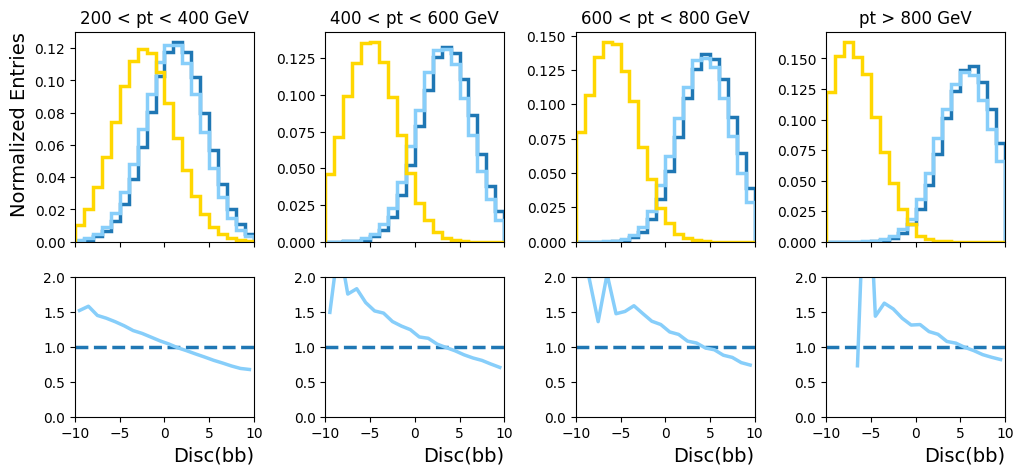

In [1117]:
fig, ax = plt.subplots(2,4,figsize=(12,5),height_ratios=(.6,.4),sharex=True,gridspec_kw={'wspace':.4})

pts = [200,400,600,800,np.inf]
nbi=20

# Safe the discretized SFs to make the plot
xs = []
sfs = []
labels = []
for ax_i,ax_i_rat,pt_min, pt_max in zip(ax[0],ax[1],pts[:-1],pts[1:]):

    smask = (s_pt > pt_min) & (s_pt < pt_max)
    bmask = (b_pt > pt_min) & (b_pt < pt_max)
    
    h_mc,e,*_ = ax_i.hist(s[smask],nbi,r,histtype='step',color=c_mc,lw=lw,label='MC bb',density=True)
    h_dat,*_  = ax_i.hist(s_data[smask],nbi,r,histtype='step',color=c_dat,lw=lw,label='data bb',density=True)
    h_qcd,*_  = ax_i.hist(b[bmask],nbi,r,histtype='step',color=c_qcd,lw=lw,label="QCD",density=True)

    xi = .5 * (e[1:] + e[:-1])
    
    ax_i_rat.plot(r,[1]*2,c_mc,ls='--',lw=lw)
    ax_i_rat.plot(xi,h_dat/h_mc,c_dat,lw=lw)

    sfs.append(h_dat/h_mc)
    
    ax_i_rat.set_xlabel('Disc(bb)',fontsize=14,loc='right')
    ax_i.set_xlim(r)
    ax_i_rat.set_ylim(0,2)
    title = f'pt > {pt_min} GeV' if pt_max == np.inf else f'{pt_min} < pt < {pt_max} GeV'
    ax_i.set_title(title)
    labels.append(title)

ax[0,0].set_ylabel('Normalized Entries',fontsize=14,loc='top')
plt.show()

(-10.0, 10.0)

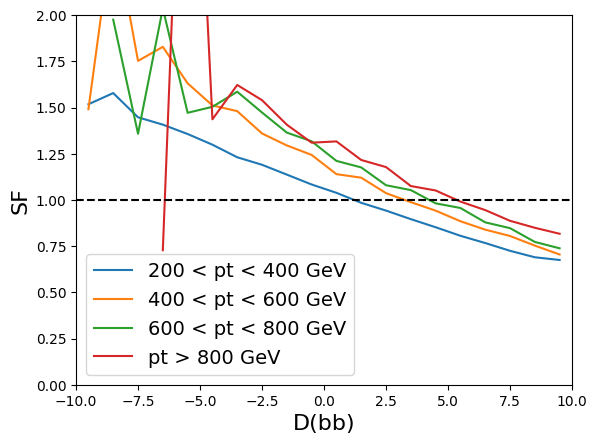

In [1118]:
# Overlay the SFs for each of these pt bins

for sfi,li in zip(sfs,labels):
    plt.plot(xi,sfi,label=li)

plt.plot(r,[1]*2,'k--')
plt.xlabel('D(bb)',fontsize=16)
plt.ylabel('SF',fontsize=16)
plt.legend(fontsize=14,loc='lower left')
plt.ylim(0,2)
plt.xlim(r)

OK, so even with the little toy generator that I've set up, there's def a dependence for the SF with the chosen pT bin.

This is entering b/c ...

## Make a 2d surface plot with the analytical formula

In [1119]:
xx = np.linspace(*r_pt) # pt axis
yy = np.linspace(*r) # Dbb axis

xv, yv = np.meshgrid(xx,yy)

In [1120]:
xv.shape

(50, 50)

In [1121]:
mu = 0
std = 1

s_pt_shift = 200
s_pt_scale = 200

s_bb_scale = 3
s_bb_delta = 0.5

According to [wikipedia](https://en.wikipedia.org/wiki/Log-normal_distribution) the Log-normal distribution (RV whose logarithm is distributed normally) has a pdf:

$$p_Z(z) = \frac{1}{z \sigma \sqrt{2\pi}} \exp \left(- \frac{(\ln (z) - \mu)^2}{2 \sigma^2} \right),$$

where $\mu$ and $\sigma$ are the parameters of the normal distribution that $\log Z$ follows.

`s = (2*s_z+3) + 3* np.random.normal(size=(N,))`

I think to get the probability of this guy, I subtract off the "s_z" piece from the `s` term, and then get smth else?

**Note also** When transforming probability distributions, it's important to keep track of the Jacobian

$$p_X(x) dx = p_Z(z) dz$$

$$p_X(x)  = p_Z(z) |\frac{dz}{dx}| = p_Z(z) |\frac{dx}{dz}|^{-1}$$

If $z$ is the var distributed log-normally, then we get $p_T$ from z as $x = f(z) = 200 + 200 z$, with Jacobian is $\frac{dx}{dz} = 200$.

In [1122]:
s_bb_scale

3

In [1123]:
zv = (xv - s_pt_shift) / s_pt_scale
p_z = 1/(zv*std *np.sqrt(2*np.pi)) * np.exp( - .5 * ( (np.log(zv)-mu) / std)**2)

dx_dz = s_pt_scale
p_x = p_z * dx_dz**-1

x_norm = (yv - (2*np.log(zv) + 3)) / s_bb_scale

p_mc  = p_x / (np.sqrt(2*np.pi)) * np.exp(- .5 * x_norm**2) / s_bb_scale
p_dat = p_x / (np.sqrt(2*np.pi)) * np.exp(- .5 * (x_norm +  s_bb_delta)**2) / s_bb_scale

/var/folders/5j/ynfw2g6n2cgdwgp6xdh3byn00000gp/T/ipykernel_82947/3274143270.py:2: RuntimeWarning: divide by zero encountered in divide
  p_z = 1/(zv*std *np.sqrt(2*np.pi)) * np.exp( - .5 * ( (np.log(zv)-mu) / std)**2)
/var/folders/5j/ynfw2g6n2cgdwgp6xdh3byn00000gp/T/ipykernel_82947/3274143270.py:2: RuntimeWarning: divide by zero encountered in log
  p_z = 1/(zv*std *np.sqrt(2*np.pi)) * np.exp( - .5 * ( (np.log(zv)-mu) / std)**2)
/var/folders/5j/ynfw2g6n2cgdwgp6xdh3byn00000gp/T/ipykernel_82947/3274143270.py:2: RuntimeWarning: invalid value encountered in multiply
  p_z = 1/(zv*std *np.sqrt(2*np.pi)) * np.exp( - .5 * ( (np.log(zv)-mu) / std)**2)
/var/folders/5j/ynfw2g6n2cgdwgp6xdh3byn00000gp/T/ipykernel_82947/3274143270.py:7: RuntimeWarning: divide by zero encountered in log
  x_norm = (yv - (2*np.log(zv) + 3)) / s_bb_scale


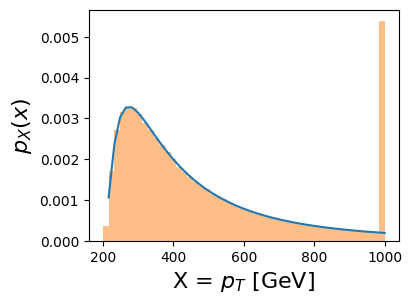

In [1124]:
plt.figure(figsize=(4,3))

plt.plot(xv[0],p_x[0])
plt.hist(np.clip(s_pt,*r_pt),nb,r_pt,density=True,alpha=.5)

plt.xlabel('X = $p_T$ [GeV]',fontsize=16)
plt.ylabel('$p_X(x)$',fontsize=16)
plt.show()

Ok, the pT marginal probability looks good :)

To sanity check the full 2d pdf, we'll need to compare with the discretized 2d histogram.

In [1125]:
# Concatenate the guys 
x_test = np.concatenate([np.vstack([s_pt,s_data]).T,np.vstack([s_pt,s]).T],axis=0)
y_test = np.concatenate([np.zeros(N),np.ones(N)])

idx = np.arange(2*N)
np.random.shuffle(idx)

y_test = y_test[idx]
x_test = x_test[idx]

In [1126]:
ex = np.linspace(*r_pt,nb+1)
ey = np.linspace(*r,   nb+1)

# account for under / overflow
ex[-1] = np.inf
ey[0] = -np.inf
ey[-1] = np.inf

kwargs = {'bins': [ex, ey]}
h_mc_2d,*_  = np.histogram2d(*x_test[y_test==1].T,**kwargs) 
h_dat_2d,*_ = np.histogram2d(*x_test[y_test==0].T,**kwargs) 

# divide before normalizinfg, avoiding precision errors
h_sf_2d = h_dat_2d / h_mc_2d

# Norm the og hists
dxy = (ex[2] - ex[1]) * (ey[2] - ey[1])
h_mc_2d /= (dxy * N)
h_dat_2d /= (dxy * N)

/var/folders/5j/ynfw2g6n2cgdwgp6xdh3byn00000gp/T/ipykernel_82947/1731520318.py:14: RuntimeWarning: divide by zero encountered in divide
  h_sf_2d = h_dat_2d / h_mc_2d
/var/folders/5j/ynfw2g6n2cgdwgp6xdh3byn00000gp/T/ipykernel_82947/1731520318.py:14: RuntimeWarning: invalid value encountered in divide
  h_sf_2d = h_dat_2d / h_mc_2d


0 0.0004347946458495985
0 0.0004347946458495985
0 2
0 0.0004347946458495985
0 0.0004347946458495985
0 2


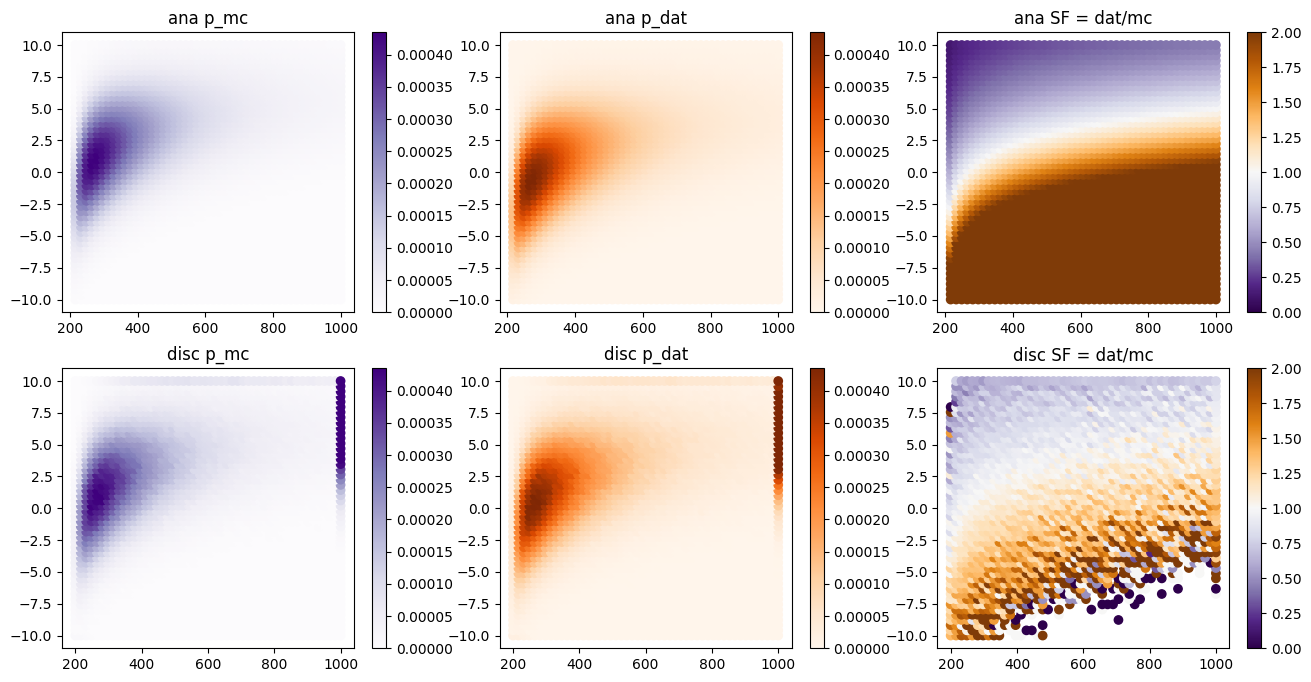

In [1136]:
fig,ax = plt.subplots(2,3,figsize=(16,8))

h_list = [[p_mc,p_dat,p_dat/p_mc],
          [h_mc_2d.T, h_dat_2d.T, h_sf_2d.T]]

for met,hl,ax_row in zip(['ana','disc'],h_list,ax):
    for axi,hi,li,vmin,vmax,cmap in zip(ax_row,hl,['p_mc','p_dat','SF = dat/mc'],[0,0,0],
                                   [np.nan_to_num(p_dat).max(),np.nan_to_num(p_dat).max(),2],
                                       ['Purples','Oranges','PuOr_r']): 

        print(vmin,vmax)
        cm  = axi.scatter(xv,yv,c=hi,vmin=vmin,vmax=vmax,cmap=cmap)
        plt.colorbar(cm,ax=axi)
        axi.set_title(f'{met} {li}')
    
plt.show()

###### OK, definitely a sanity check pass :) 
And also you can see here that the "analytical" version is smoother thaan the discretized one, which is awesome :)

In [1137]:
from scipy.stats import binned_statistic_2d

In [1138]:
*_ ,idx = binned_statistic_2d(*x_test[y_test==1].T,None,
                              'count', bins=nb, range=[r_pt,r],
                              expand_binnumbers=True)

idx = np.where(idx==0,1,idx)
idx = np.where(idx==nb+1,nb,idx)
idx -= 1

In [1139]:
# The indices corrsponding to the bins of each of the MC points
idx.shape

(2, 1000000)

In [1140]:
# this is the _true_ SF for the MC x_test events, from the discretized 2d hists
sf_disc = h_sf_2d[*idx] 
print('sf_disc',sf_disc.shape)
print('min',sf_disc.min(),'max',sf_disc.max() )

sf_disc (1000000,)
min 0.0 max 13.0


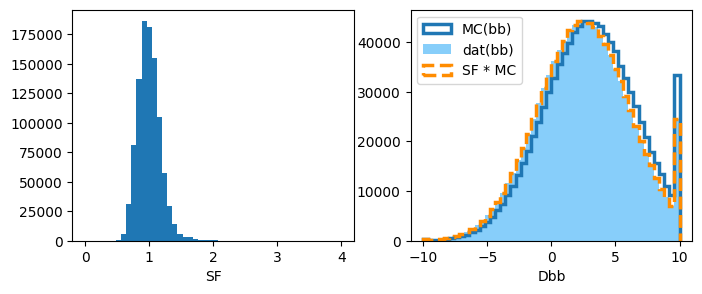

In [1141]:
fig,ax = plt.subplots(1,2,figsize=(8,3))

ax[0].hist(sf_disc,nb,(0,4))
ax[0].set_xlabel('SF')

ax[1].hist(np.clip(s,*r),nb,r,histtype='step',color=c_mc,lw=lw,label='MC(bb)')

ax[1].hist(np.clip(s_data,*r),nb,r,color=c_dat,lw=lw,label='dat(bb)')
ax[1].hist(np.clip(x_test[y_test==1,1],*r),nb,r,color='darkorange',label='SF * MC',
                  weights=sf_disc,histtype='step',lw=lw,ls='--')
ax[1].legend()
ax[1].set_xlabel('Dbb')
plt.show()

## Step 1: What's the "best case" loss

Alright... now, let's try to estimate what the _minimum_ of the loss is for this new 2d setup!
 

### BCE loss

In [1188]:
def get_true_sf(x,log=False):
    '''
    Input:
    - x: (bs, 2) for the pt, D(bb) features
    '''
    
    pt, Dbb  = x.T
    
    z = (pt - s_pt_shift) / s_pt_scale
    x_norm = (Dbb - (2*np.log(z) + 3)) / s_bb_scale
    
    # p_mc  ~ np.exp(- .5 * x_norm**2) / s_bb_scale
    # p_dat ~ np.exp(- .5 * (x_norm +  s_bb_delta)**2) / s_bb_scale

    log_sf = - x_norm * s_bb_delta - 0.5 * s_bb_delta**2


    if log:
        return log_sf
    else:
        return np.exp( log_sf )

In [1189]:
def get_disc_from_sf(sf):
    return 1/(1+sf)

In [1190]:
sf_true = get_true_sf(x_test)
print('sf',sf_true)
D_true  = get_disc_from_sf(sf_true)

sf [0.21318431 1.52908303 0.49640483 ... 0.69291589 0.4473769  0.5828124 ]


In [1191]:
np.min(sf_true),np.max(sf_true)

(0.08346803125097918, 12.063320774545506)

Text(0, 0.5, 'Entries')

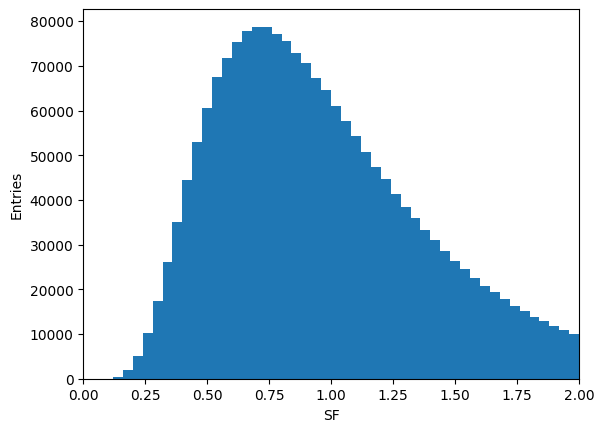

In [1192]:
plt.hist(sf_true,50,(0,2))
plt.xlim(0,2)
plt.xlabel('SF')
plt.ylabel('Entries')

- The lowest pTs have values less than 1
- And the data generation process that I chose has a lot of low pTs (steeply falling dist)
- So I think most of the weights being smaller than 1 is an internally consistent story atm.

In [1197]:
for i in range(1,7):
    ni = 2*int(10**i)
    li = nn.BCELoss()(torch.FloatTensor(D_true[:ni]), torch.FloatTensor(y_test[:ni]))
    print(ni,li.numpy())

bce_best = li.numpy()

20 0.639825
200 0.68575263
2000 0.7128239
20000 0.70292765
200000 0.7040083
2000000 0.7036328


In [1194]:
np.log(2)

0.6931471805599453

In [1196]:
nn.BCELoss()(torch.FloatTensor(get_disc_from_sf(sf_disc)), 
             torch.FloatTensor(y_test[y_test==1]))

tensor(0.6891)

OK, for this generator with the BCE loss, the minimum of the BCE loss should go down to about 0.82.

### Louppe loss

In [1198]:
def louppe_loss(y_pred, y_true, w=None, sf_min=.001, sf_max = 1000,
                debug=False, reduce=True):
    '''
    Loss fct Rafael, HH4b analysis
    '''

    sf = torch.exp(y_pred)
    mi = (sf > sf_min) & (sf < sf_max)
    if debug:
        print('  sum(~mi)',(~mi).sum())
    loss = y_true[mi] * torch.sqrt(sf[mi]) + \
            (1.0 - y_true[mi]) * (1.0 / torch.sqrt(sf[mi]))

    if reduce == False:
        return loss
    elif w is None:
        return loss.mean()
    else:
        return torch.sum(loss * w[mi]) / torch.sum(w[mi])

In [1200]:
log_sf = get_true_sf(x_test,log=True)

In [1201]:
for i in range(1,7):
    ni = 2*int(10**i)
    li = louppe_loss(torch.FloatTensor(log_sf[:ni]), torch.FloatTensor(y_test[:ni]),debug=True)
    print(ni,li.numpy())

louppe_best = li.numpy()

  sum(~mi) tensor(0)
20 0.9447082
  sum(~mi) tensor(0)
200 0.99258304
  sum(~mi) tensor(0)
2000 1.0208032
  sum(~mi) tensor(0)
20000 1.0105164
  sum(~mi) tensor(0)
200000 1.0116533
  sum(~mi) tensor(0)
2000000 1.0112939


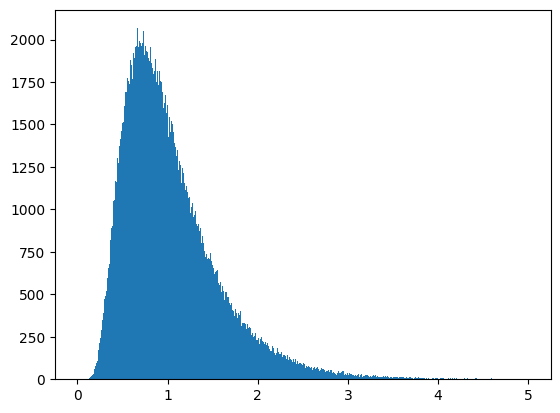

In [1202]:
h,e,_ = plt.hist(np.exp(log_sf),5000,(0,5))
plt.show()

In [1203]:
e[:2],h[0]

(array([0.   , 0.001]), 0.0)

OK, this lowest bin has about 1500 entries, consistent w/ the `print` statement that I have.

In [1204]:
start = int(5e5)
louppe_loss(torch.FloatTensor(log_sf[start:ni]), torch.FloatTensor(y_test[start:ni]))

tensor(1.0112)

In [1205]:
louppe_loss(torch.FloatTensor(np.log(sf_disc)), torch.FloatTensor(y_test[y_test==1]))

/var/folders/5j/ynfw2g6n2cgdwgp6xdh3byn00000gp/T/ipykernel_82947/2629686942.py:1: RuntimeWarning: divide by zero encountered in log
  louppe_loss(torch.FloatTensor(np.log(sf_disc)), torch.FloatTensor(y_test[y_test==1]))


tensor(0.9960)

In [1206]:
y_pred = torch.FloatTensor(log_sf[start:ni])
y_true = torch.FloatTensor(y_test[start:ni])

In [1207]:
loss = (y_true * (torch.sqrt(torch.exp(y_pred))) + 
            (1.0 - y_true) * (1.0 / torch.sqrt(torch.exp(y_pred))))

In [1208]:
loss.min(),loss.max()

(tensor(0.2879), tensor(3.3200))

In [1209]:
np.arange(start,ni)[loss > 3e11]

array([], dtype=int64)

In [1210]:
x_test[583018]

array([410.37893335,   8.15169802])

- pT = 25,585 GeV
- Dbb = 10.2

OK, this is a very very high pT, and it makes sense when the support is so _low_ that we'll have very large SFs.

I could:
1. Only consider a range for the SFs when computing the loss
2. Maybe gradient clipping also solves the issue?

I'll go with (1) though b/c I have some intutiion for what values are common or wierd here.

## Step 2: Train the models

In [1211]:
def make_batch(N=256, with_bkg=True):
    '''
    Batches with the discriminant depending on the pt
    
    Inputs:
    - N: batch size

    Outputs:
    - x: tensor (4*N,2) (pt,p_bb)
    - y: labels (4*N,)
        * 1: MC 
        * 0: data
        * 0: bkg
    - w: weights
        * The weight will be 1 for the terms that are in the MC or data(all) [s_data, b_data] components
        * Weight -1 for the b_est piece that we're subtracting off
    '''

    # Get the pts
    s_z     = np.random.normal(size=(N,))
    b_z_dat = np.random.normal(size=(N,))
    b_z_est = np.random.normal(size=(N,))
    
    s_pt = 200 + 200*np.exp(s_z)
    
    b_pt_dat = 200 + 100*np.exp(b_z_dat)
    b_pt_est = 200 + 100*np.exp(b_z_est)
    
    s = (2*s_z+3) + 3* np.random.normal(size=(N,))
    
    b_dat = (-2*b_z_dat-3) + 3* np.random.normal(size=(N,))
    b_est = (-2*b_z_est-3) + 3* np.random.normal(size=(N,))
    
    s_dat = s -.5

    # Concatenate onto the pt
    pt = np.concatenate([s_pt,s_pt, b_pt_dat,b_pt_est],axis=0)
    Dbb = np.concatenate([s,  s_dat,b_dat,   b_est],axis=0)

    x = np.concatenate([pt[:,None],Dbb[:,None]],axis=1)
    y = np.concatenate([np.ones(N),np.zeros(3*N)],axis=0)
    w = np.concatenate([np.ones(3*N),-np.ones(N)])
    
    # Shuffle + convert to float tensor
    idx = np.arange(len(y))
    np.random.shuffle(idx)

    x = torch.FloatTensor(x[idx])
    y = torch.FloatTensor(y[idx]).reshape(-1,1)
    w = torch.FloatTensor(w[idx]).reshape(-1,1)
    
    return x, y, w 

In [1212]:
x, y, w = make_batch(8192)

### BCE loss

In [1213]:
H=128
m = nn.Sequential(
    nn.Linear(2,H),
    nn.ReLU(),
    nn.Linear(H,H),
    nn.ReLU(),
    nn.Linear(H,1),
    nn.Sigmoid()
)

In [1214]:
Niter=1000
lr = 1e-4
Nbatch=8192

# init the optimizer
opt = torch.optim.Adam(m.parameters(),lr)
loss = []

for i in range(Niter):

    x,y,w = make_batch(Nbatch)
    
    m.zero_grad()

    y_pred = m(x)
    li = nn.BCELoss(weight=w,reduction='sum')(y_pred, y)
    li /= (2*Nbatch)
    # li = nn.BCELoss()(y_pred, y)
    
    li.backward()
    opt.step()

    print(i,li.item())
    loss.append(li.item())

0 9.315191268920898
1 4.370314598083496
2 1.3121979236602783
3 1.0899014472961426
4 1.8517942428588867
5 1.9266294240951538
6 1.5420477390289307
7 0.9945346117019653
8 0.7066563367843628
9 1.084438681602478
10 1.3727681636810303
11 1.329300045967102
12 1.0526422262191772
13 0.7496143579483032
14 0.7620176672935486
15 0.9719887971878052
16 1.059255838394165
17 0.978789210319519
18 0.7846506834030151
19 0.6979236602783203
20 0.8251409530639648
21 0.9171498417854309
22 0.8796876668930054
23 0.766584038734436
24 0.69261234998703
25 0.7660431861877441
26 0.8369960188865662
27 0.8064665794372559
28 0.7232919931411743
29 0.6965030431747437
30 0.7542910575866699
31 0.7811878323554993
32 0.7439461946487427
33 0.6954038143157959
34 0.7089456915855408
35 0.745477020740509
36 0.7430552244186401
37 0.704066276550293
38 0.6947128772735596
39 0.7214680910110474
40 0.7298917770385742
41 0.7051323652267456
42 0.692345380783081
43 0.710338830947876
44 0.7178267240524292
45 0.7022811770439148
46 0.691982

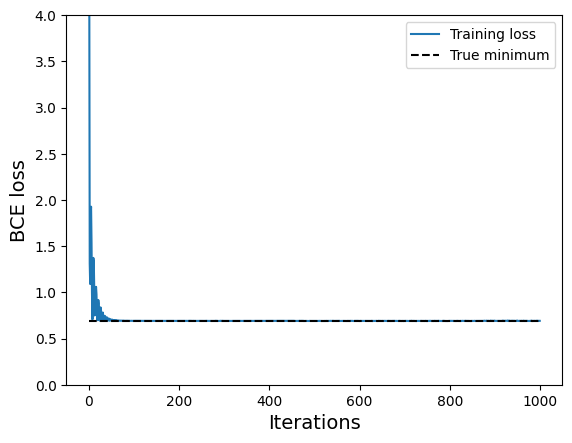

In [1215]:
plt.plot(loss,label='Training loss')
plt.plot(range(Niter),[.6891]*Niter,'k--',label='True minimum')
plt.xlabel('Iterations',fontsize=14)
plt.ylabel('BCE loss',fontsize=14)
plt.legend()
plt.ylim(0,4)
plt.show()

In [1216]:
def get_SF(m,x):
    d = m(x).squeeze()
    return (1/d - 1).numpy()

In [1217]:
# # Get probabilities
# xx = np.linspace(*r)

# # p_MC =  1 / ( np.sqrt(2 * np.pi) * std) * np.exp(-0.5 * ((xx-mu)/std)**2)
# # p_dat =  1 / ( np.sqrt(2 * np.pi) * std) * np.exp(-0.5 * ((xx-(mu-delta))/std)**2)

# with torch.no_grad():
#     sf = get_SF(m,torch.FloatTensor(xx).reshape(-1,1))

# '''
# draw plot
# '''
# fig, (ax,ax_rat) = plt.subplots(2,1, sharex=True, height_ratios=(.5,.5))

# c_bce = 'darkorange'
# ax.plot(xx,p_MC, c_mc, label='MC')
# ax.plot(xx,p_dat,c_dat,label='dat')
# ax.plot(xx,p_MC * sf,c_bce,ls='--',label='rw MC')

# ax_rat.plot(xx,np.ones_like(xx),color=c_mc,ls='--')
# ax_rat.plot(xx,p_dat/p_MC,color=c_dat,label='true SF')

# ax_rat.plot(xx,sf,color=c_bce,ls='--',label='NN SF')

# ax.legend(fontsize=14)
# ax_rat.set_xlabel('Disc',fontsize=20,loc='right')
# ax.set_ylabel('Entries',fontsize=20,loc='top')
# ax_rat.set_ylabel('SF',fontsize=20,loc='center') #  = dat / MC

# # ax_rat.legend()

# ax.set_xlim(r)
# ax_rat.set_ylim(0,2)
# plt.show()


In [1218]:
with torch.no_grad():
    sf = get_SF(m,torch.FloatTensor(x_test[y_test.squeeze()==1]))

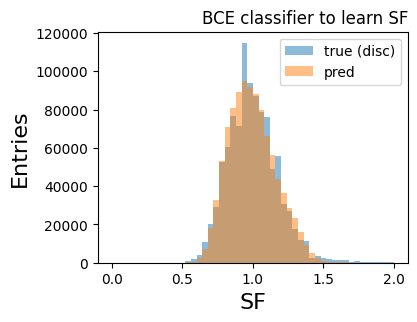

In [1234]:
plt.figure(figsize=(4,3))
plt.hist(sf_disc,nb,(0,2),alpha=.5,label='true (disc)')
plt.hist(sf,nb,(0,2),alpha=.5,label='pred')
plt.xlabel('SF',fontsize=16)
plt.ylabel('Entries',fontsize=16)
plt.title('BCE classifier to learn SF',loc='right')
plt.legend()
plt.show()

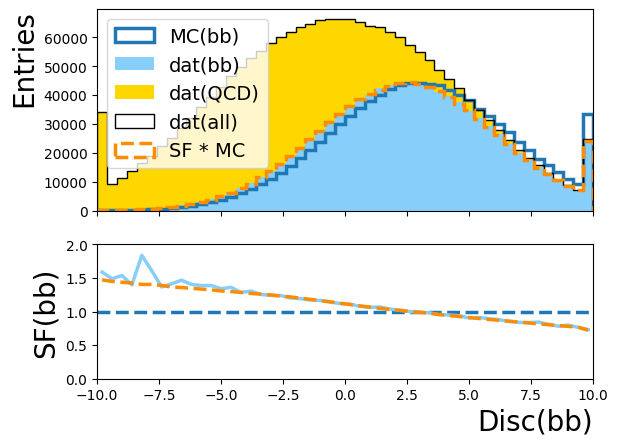

In [1235]:
fig, (ax,ax_rat) = plt.subplots(2,1, sharex=True, height_ratios=(.6,.4))

h_mc,e,_ = ax.hist(np.clip(s,*r),nb,r,histtype='step',color=c_mc,lw=lw,label='MC(bb)')

h_dat,*_ = ax.hist(np.clip(s_data,*r),nb,r,color=c_dat,lw=lw,label='dat(bb)')
h_bkg, *_ = ax.hist(np.clip(b,*r),nb,r,color='gold',label="dat(QCD)",bottom=h_dat)
h_all,*_ = ax.hist(np.clip(np.concatenate([s_data,b]),*r),nb,r,histtype='step',color='k',lw=1,label='dat(all)')
h_sf,*_ = ax.hist(np.clip(x_test[y_test==1,1],*r),nb,r,color='darkorange',label='SF * MC',
                  weights=sf,histtype='step',lw=lw,ls='--')

ax_rat.plot(r,[1]*2,c_mc,ls='--',lw=lw)

# Plot the SF
xx = .5 * (e[1:] + e[:-1])
ax_rat.plot(xx[h_mc > 0],h_dat[h_mc > 0] / h_mc[h_mc > 0],color=c_dat,lw=lw)
ax_rat.plot(xx[h_mc > 0],h_sf[h_mc > 0] / h_mc[h_sf > 0],color='darkorange',lw=lw,ls='--')

ax.legend(fontsize=14)
ax_rat.set_xlabel('Disc(bb)',fontsize=20,loc='right')
ax.set_ylabel('Entries',fontsize=20,loc='top')
ax_rat.set_ylabel('SF(bb)',fontsize=20,loc='center') #  = dat / MC

ax.set_xlim(r)
ax_rat.set_ylim(0,2)
plt.show()


And now the plot broken down by pT

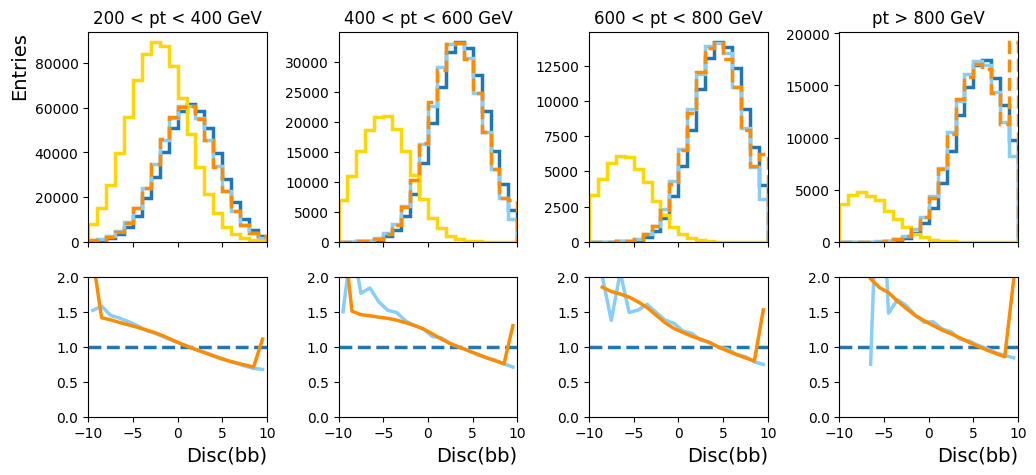

In [1263]:
fig, ax = plt.subplots(2,4,figsize=(12,5),height_ratios=(.6,.4),sharex=True,gridspec_kw={'wspace':.4})

pts = [200,400,600,800,np.inf]
nbi=20

density=False

for ax_i,ax_i_rat,pt_min, pt_max in zip(ax[0],ax[1],pts[:-1],pts[1:]):

    smask = (s_pt > pt_min) & (s_pt < pt_max)
    bmask = (b_pt > pt_min) & (b_pt < pt_max)
    
    h_mc,e,*_= ax_i.hist(s[smask],nbi,r,histtype='step',color=c_mc,lw=lw,label='MC bb',density=density)
    h_dat,*_ = ax_i.hist(s_data[smask],nbi,r,histtype='step',color=c_dat,lw=lw,label='data bb',density=density)
    h_qcd,*_ = ax_i.hist(b[bmask],nbi,r,histtype='step',color=c_qcd,lw=lw,label="QCD",density=density)
    
    mj = (x_test[y_test==1,0] > pt_min) & (x_test[y_test==1,0] < pt_max)
    h_sf, *_ = ax_i.hist(np.clip(x_test[y_test==1,1][mj],*r),nbi,r,color='darkorange',label='SF * MC',
                         weights=sf[mj],histtype='step',lw=lw,ls='--',density=density)

    
    xi = .5 * (e[1:] + e[:-1])
    mi = h_mc>0
    ax_i_rat.plot(r,[1]*2,c_mc,ls='--',lw=lw)
    ax_i_rat.plot(xi[mi],h_dat[mi]/h_mc[mi],c_dat,lw=lw)
    ax_i_rat.plot(xi[mi],h_sf[mi]/h_mc[mi],'darkorange',lw=lw)

    ax_i_rat.set_xlabel('Disc(bb)',fontsize=14,loc='right')
    ax_i.set_xlim(r)
    ax_i_rat.set_ylim(0,2)
    title = f'pt > {pt_min} GeV' if pt_max == np.inf else f'{pt_min} < pt < {pt_max} GeV'
    ax_i.set_title(title)
    
ax[0,0].set_ylabel('Normalized Entries' if density else 'Entries',fontsize=14,loc='top')
plt.show()

OK, I think we have the 2d depency here also.

Compare the 2d pdf

In [1236]:
# # Get the analytic eval of the SF with this model
# x_grid = np.vstack([xv.flatten(),yv.flatten()]).T
# x_grid = torch.FloatTensor(x_grid)

# with torch.no_grad():
#     sf_cts_bce = get_SF(m,x_grid).reshape(nb,nb)


# fig, ax = plt.subplots(figsize=(4,4), subplot_kw={"projection": "3d"})

# ax.plot_surface(xv,yv,p_dat/p_mc,cmap='Blues') 

# ax.plot_surface(xv,yv,sf_cts_bce,cmap='Oranges') 

# ax.set_xlabel('Dbb',fontsize=15)
# ax.set_ylabel('pT',fontsize=15)
# ax.set_title('p_dat(Dbb,pT)',fontsize=15)

# ax.set_zlim(0,4)

# plt.show()

Compare the SF calculated for a few _fixed values_ of pT?

In [1237]:
i=0
print(xv[:,i])
print(yv[:,i])

[200. 200. 200. 200. 200. 200. 200. 200. 200. 200. 200. 200. 200. 200.
 200. 200. 200. 200. 200. 200. 200. 200. 200. 200. 200. 200. 200. 200.
 200. 200. 200. 200. 200. 200. 200. 200. 200. 200. 200. 200. 200. 200.
 200. 200. 200. 200. 200. 200. 200. 200.]
[-10.          -9.59183673  -9.18367347  -8.7755102   -8.36734694
  -7.95918367  -7.55102041  -7.14285714  -6.73469388  -6.32653061
  -5.91836735  -5.51020408  -5.10204082  -4.69387755  -4.28571429
  -3.87755102  -3.46938776  -3.06122449  -2.65306122  -2.24489796
  -1.83673469  -1.42857143  -1.02040816  -0.6122449   -0.20408163
   0.20408163   0.6122449    1.02040816   1.42857143   1.83673469
   2.24489796   2.65306122   3.06122449   3.46938776   3.87755102
   4.28571429   4.69387755   5.10204082   5.51020408   5.91836735
   6.32653061   6.73469388   7.14285714   7.55102041   7.95918367
   8.36734694   8.7755102    9.18367347   9.59183673  10.        ]


In [1241]:
# fig,ax = plt.subplots(1,2,figsize=(12,3))

# ax[1] = plt.hist2d()

In [1253]:
# for i in range(0,nb,10):

#     xi = np.vstack([xv[:,i],yv[:,i]]).T
#     xi = torch.FloatTensor(xi)
#     with torch.no_grad():
#         sf_i = get_SF(m,xi)
    
#     plt.plot(yv[:,i],(p_dat/p_mc)[:,i],color=f'C{int(i/10)}',label=f'pt = {xv[0,i]:.0f} GeV')
#     # plt.plot(yv[:,i],sf_cts_bce[:,i],color=f'C{int(i/10)}',ls='--')
#     plt.plot(yv[:,i],sf_i,color=f'C{int(i/10)}',ls='--')

# plt.xlabel('Dbb',fontsize=16)
# plt.ylabel('SF(pt)',fontsize=16)
# plt.legend()

# plt.xlim(-5,10)

### Louppe loss

In [1225]:
H=128
Q = nn.Sequential(
    nn.Linear(2,H),
    nn.BatchNorm1d(num_features=H),
    nn.ReLU(),
    nn.Linear(H,H),
    nn.BatchNorm1d(num_features=H),
    nn.ReLU(),
    nn.Linear(H,H),
    nn.BatchNorm1d(num_features=H),
    nn.ReLU(),
    nn.Linear(H,1)
)

In [1226]:
with torch.no_grad():
    q = Q(torch.FloatTensor(x_test))

loss_init = louppe_loss(q,torch.FloatTensor(y_test.reshape(-1,1))).numpy()
print(loss_init)

1.0102903


In [1227]:
loss_init/louppe_best

0.9990076

OK, there's now quite a difference b/w the original loss and the best, loss... let's try training!!

In [1228]:
w.shape

torch.Size([32768, 1])

In [1229]:
Niter=1000
lr = 1e-5
Nbatch=8192

# init the optimizer
opt = torch.optim.Adam(Q.parameters(),lr)
loss = []

Q.train()

for i in range(Niter):

    x,y,w = make_batch(Nbatch)
    
    Q.zero_grad()

    y_pred = Q(x)
    li = louppe_loss(y_pred, y, w)

    li.backward()
    opt.step()

    loss.append(li.item())
    if i % 100 == 0:
        print(i,li.item())
    
Q.eval()

0 1.0122900009155273
100 0.9981398582458496
200 0.9956223368644714
300 0.9970934391021729
400 0.99605792760849
500 0.9960325360298157
600 0.9971418380737305
700 0.9965768456459045
800 0.9971848726272583
900 0.9973812103271484


Sequential(
  (0): Linear(in_features=2, out_features=128, bias=True)
  (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (2): ReLU()
  (3): Linear(in_features=128, out_features=128, bias=True)
  (4): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (5): ReLU()
  (6): Linear(in_features=128, out_features=128, bias=True)
  (7): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (8): ReLU()
  (9): Linear(in_features=128, out_features=1, bias=True)
)

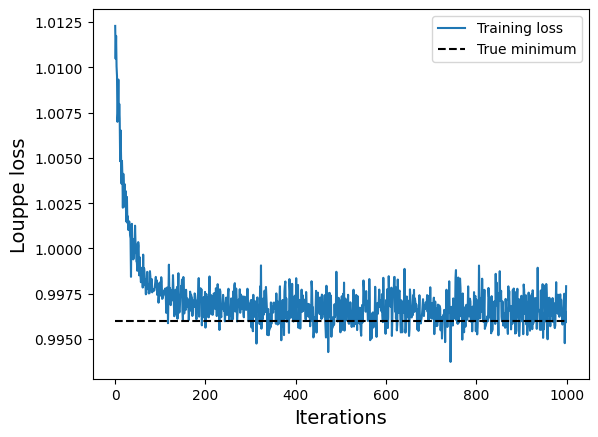

In [1230]:
plt.plot(np.array(loss),label='Training loss')
plt.plot(range(Niter),[.9960]*Niter,'k--',label='True minimum')
plt.xlabel('Iterations',fontsize=14)
plt.ylabel('Louppe loss',fontsize=14)
plt.legend()
plt.show()

In [1231]:
x.shape

torch.Size([32768, 2])

Sanity check the learned weights

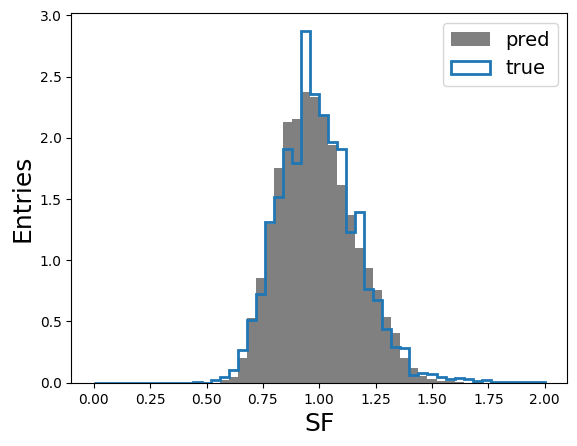

In [1232]:
with torch.no_grad():
    q = Q(x)

# Buggy, idk why (?)
# true_weights = get_true_sf(x[y.squeeze()==1])
pred_weights=np.exp(q[y==1].numpy())

plt.hist(pred_weights,nb,(0,2),color='grey',label='pred',density=True)
plt.hist(sf_disc,nb,(0,2),histtype='step',color=c_mc,lw=2,label='true',density=True)
plt.xlabel('SF',fontsize=18)
plt.ylabel('Entries',fontsize=18)
plt.legend(fontsize=14)
plt.show()

**Histogram level plot**

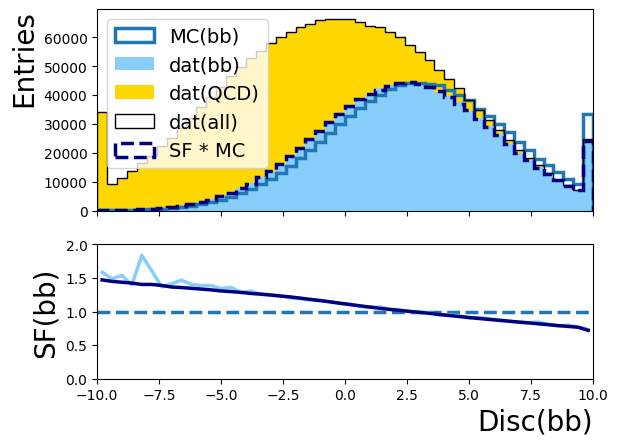

In [1254]:
fig, (ax,ax_rat) = plt.subplots(2,1, sharex=True, height_ratios=(.6,.4))

with torch.no_grad():
    q = Q(torch.FloatTensor(x_test[y_test.squeeze()==1])).squeeze().numpy()
sf = np.exp(q)

h_mc,e,_ = ax.hist(np.clip(s,*r),nb,r,histtype='step',color=c_mc,lw=lw,label='MC(bb)')

h_dat,*_ = ax.hist(np.clip(s_data,*r),nb,r,color=c_dat,lw=lw,label='dat(bb)')
h_bkg, *_ = ax.hist(np.clip(b,*r),nb,r,color='gold',label="dat(QCD)",bottom=h_dat)
h_all,*_ = ax.hist(np.clip(np.concatenate([s_data,b]),*r),nb,r,
                   histtype='step', color='k', lw=1, label='dat(all)')
h_sf,*_ = ax.hist(np.clip(x_test[y_test==1,1],*r), nb, r, color='navy', label='SF * MC',
                  weights=sf,histtype='step',lw=lw,ls='--')

ax_rat.plot(r,[1]*2,c_mc,ls='--',lw=lw)

# Plot the SF
xx = .5 * (e[1:] + e[:-1])
ax_rat.plot(xx[h_mc > 0],h_dat[h_mc > 0] / h_mc[h_mc > 0],color=c_dat,lw=lw)
ax_rat.plot(xx[h_mc > 0],h_sf[h_mc > 0] / h_mc[h_sf > 0],color='navy',lw=lw)

ax.legend(fontsize=14)
ax_rat.set_xlabel('Disc(bb)',fontsize=20,loc='right')
ax.set_ylabel('Entries',fontsize=20,loc='top')
ax_rat.set_ylabel('SF(bb)',fontsize=20,loc='center') #  = dat / MC

ax.set_xlim(r)
ax_rat.set_ylim(0,2)
plt.show()


**Broken down by pT**

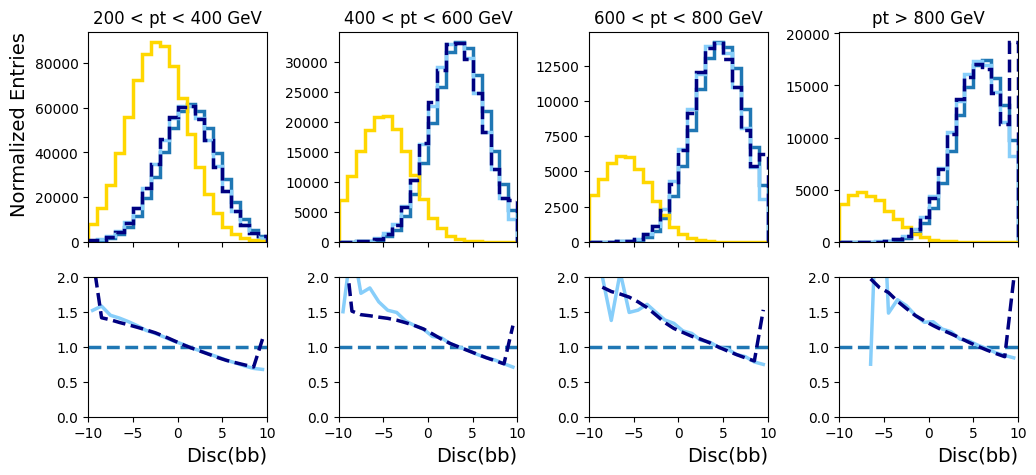

In [1264]:
fig, ax = plt.subplots(2,4,figsize=(12,5),height_ratios=(.6,.4),sharex=True,gridspec_kw={'wspace':.4})

pts = [200,400,600,800,np.inf]
nbi=20

density=False

for ax_i,ax_i_rat,pt_min, pt_max in zip(ax[0],ax[1],pts[:-1],pts[1:]):

    smask = (s_pt > pt_min) & (s_pt < pt_max)
    bmask = (b_pt > pt_min) & (b_pt < pt_max)
    
    h_mc,e,*_= ax_i.hist(s[smask],nbi,r,histtype='step',color=c_mc,lw=lw,label='MC bb',density=density)
    h_dat,*_ = ax_i.hist(s_data[smask],nbi,r,histtype='step',color=c_dat,lw=lw,label='data bb',density=density)
    h_qcd,*_ = ax_i.hist(b[bmask],nbi,r,histtype='step',color=c_qcd,lw=lw,label="QCD",density=density)
    
    mj = (x_test[y_test==1,0] > pt_min) & (x_test[y_test==1,0] < pt_max)
    h_sf, *_ = ax_i.hist(np.clip(x_test[y_test==1,1][mj],*r),nbi,r,color='navy',label='SF * MC',
                         weights=sf[mj],histtype='step',lw=lw,ls='--',density=density)

    
    xi = .5 * (e[1:] + e[:-1])
    mi = h_mc>0
    ax_i_rat.plot(r,[1]*2,c_mc,ls='--',lw=lw)
    ax_i_rat.plot(xi[mi],h_dat[mi]/h_mc[mi],c_dat,lw=lw)
    ax_i_rat.plot(xi[mi],h_sf[mi]/h_mc[mi],'navy',lw=lw,ls='--')

    ax_i_rat.set_xlabel('Disc(bb)',fontsize=14,loc='right')
    ax_i.set_xlim(r)
    ax_i_rat.set_ylim(0,2)
    title = f'pt > {pt_min} GeV' if pt_max == np.inf else f'{pt_min} < pt < {pt_max} GeV'
    ax_i.set_title(title)
ax[0,0].set_ylabel('Normalized Entries',fontsize=14,loc='top')
plt.show()

**Analytical plot**

OK, let's go to Francesco's data generation set next!